The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path += ['../../../easyXRD']


import easyxrd
from easyxrd.core import exrd

import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy



Checking required packages:

---numpy package with version 1.26.4 is available and imported 
---pymatgen package with version 2024.8.9 is available and imported 
---scipy package with version 1.14.0 is available and imported 
---pyFAI package with version 2024.5.0 is available and imported 
---xarray package with version 2024.7.0 is available and imported 
---ipympl package with version 0.9.4 is available and imported 
---pandas package with version 2.2.2 is available and imported 
---fabio package with version 2024.4.0 is available and imported 
---mp_api package with version 0.42.1 is available and imported 


Imported easyxrd with following configuration:



In [3]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

In [4]:
%%time

# import pyFAI,fabio
# ai_file = 'tiff_files/_calibration.poni'
# mask_file = 'tiff_files/_mask.edf'
# ai = pyFAI.load(ai_file)
# mask = fabio.open(mask_file).data


sample_Blank = exrd()
# with xr.open_dataset('nc_files/Blank.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Blank.tiff',img)
# sample_Blank.load_xrd_data(from_tiff_file='tiff_files/Blank.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Blank.export_ds(save_dir='nc_files',save_name='Blank.nc')
sample_Blank.load_xrd_data(from_nc_file='nc_files/Blank.nc',
                            plot=False
                            )


sample_LaB6 = exrd()
# # with xr.open_dataset('nc_files/LaB6.nc') as ds:
# #     img = (ds.dexela_imgs.mean(dim='mBaseX').astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/LaB6.tiff',img)
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file='nc_files/LaB6.nc',
                            plot=False
                            )

sample_Pt = exrd()
# # with xr.open_dataset('nc_files/Pt.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/Pt.tiff',img)
# sample_Pt.load_xrd_data(from_tiff_file='tiff_files/Pt.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Pt.export_ds(save_dir='nc_files',save_name='Pt.nc')
sample_Pt.load_xrd_data(from_nc_file='nc_files/Pt.nc',
                            plot=False
                            )

sample_DAHL = exrd()
# # with xr.open_dataset('nc_files/DAHL.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/DAHL.tiff',img)
# sample_DAHL.load_xrd_data(from_tiff_file='tiff_files/DAHL.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_DAHL.export_ds(save_dir='nc_files',save_name='DAHL.nc')
sample_DAHL.load_xrd_data(from_nc_file='nc_files/DAHL.nc',
                            plot=False
                            )

sample_Dogbone = exrd(verbose=False)
# with xr.open_dataset('nc_files/Dogbone.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Dogbone.tiff',img)
# sample_Dogbone.load_xrd_data(from_tiff_file='tiff_files/Dogbone.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Dogbone.export_ds(save_dir='nc_files',save_name='Dogbone.nc')
sample_Dogbone.load_xrd_data(from_nc_file='nc_files/Dogbone.nc',
                            plot=False
                            )

phases_LaB6 = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_Pt = [
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]


phases_Zr = [
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_PtZrZrH = [
        {"mp_id":'none', "cif":'_cifs/ZrH1.66_a=4.7839.cif', "label":"ZrH", "scale":0.993, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_ZrZrH = [
        {"mp_id":'none', "cif":'_cifs/ZrH1.66_a=4.7839.cif', "label":"ZrH", "scale":0.993, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_PtZr = [
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

CPU times: user 92.2 ms, sys: 2.01 ms, total: 94.2 ms
Wall time: 93.2 ms


# LaB6

/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)



Rwp from 1st refinement is = 4.880 
 
Background is refined. Rwp is now 4.772 (was 4.880)
After setting LeBail refinement to False, Rwp is now 5.475 (was 4.772)
Background is refined. Rwp is now 5.470 (was 5.475)


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


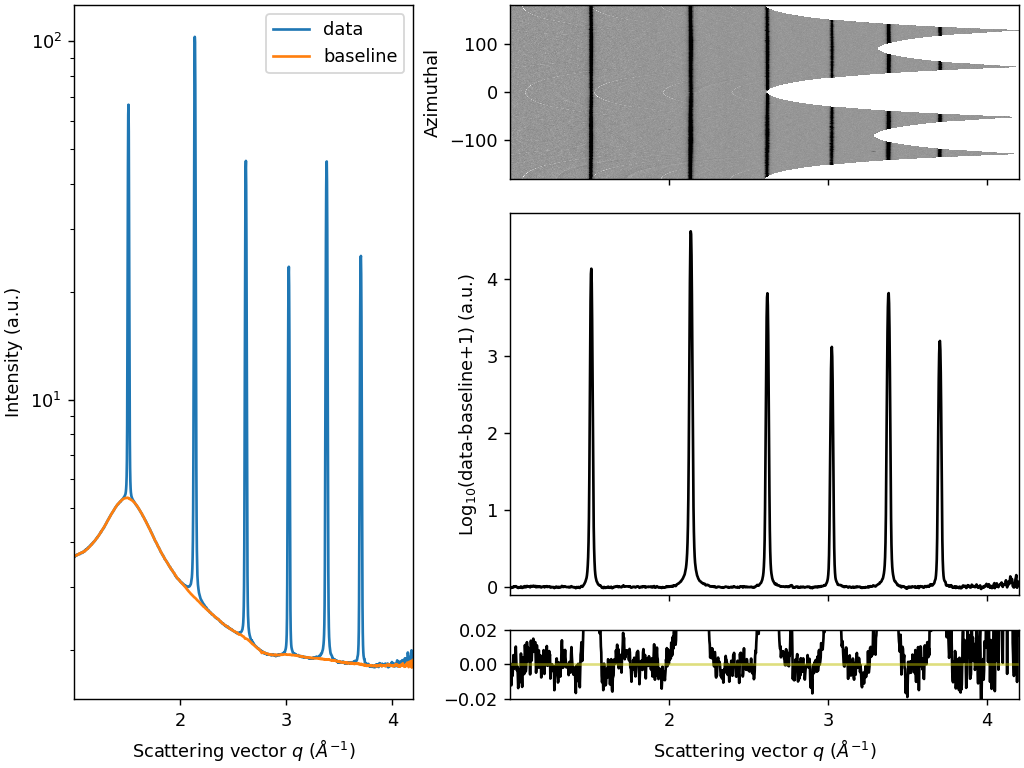

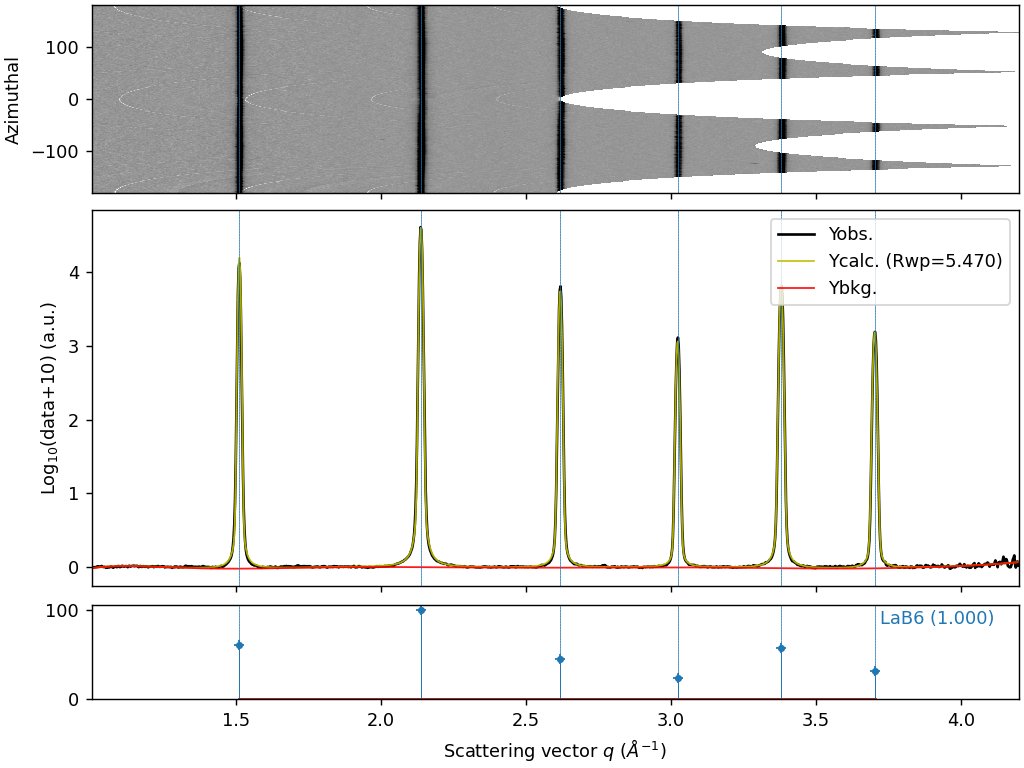

In [6]:
sample = deepcopy(sample_LaB6)
sample.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.0,4.2],
                    normalize_to = 100,
                    plot=True)
sample.load_phases(phases=phases_LaB6,plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx='gsas_instprms.gpx')
sample.refine_background(num_coeffs=10)

# SET TO RIETVELD
sample.set_LeBail(set_to=False,refine=True)
sample.refine_background(num_coeffs=10)
sample.plot_refinement()

sample.export_gpx_to('gsas_LaB6.gpx')

# Pt

/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Rwp from 1st refinement is = 21.303 
 
Background is refined. Rwp is now 20.420 (was 21.303)
Cell parameters of all phases are refined. Rwp is now 9.244 (was 20.420)
Size broadening of all phases are refined. Rwp is now 4.957 (was 9.244)
Strain broadening of all phases are refined. Rwp is now 5.020 (was 4.957)
Background is refined. Rwp is now 3.969 (was 5.020)
Cell parameters of all phases are refined. Rwp is now 4.002 (was 3.969)
Size broadening of all phases are refined. Rwp is now 3.878 (was 4.002)
Strain broadening of all phases are refined. Rwp is now 3.877 (was 3.878)
After setting LeBail refinement to False, Rwp is now 15.226 (was 3.877)
Background is refined. Rwp is now 15.128 (was 15.226)
Cell parameters of all phases are refined. Rwp is now 15.130 (was 15.128)
Size broadening of all phases are refined. Rwp is now 15.080 (was 15.130)
Strain broadening of all phases are refined. Rwp is now 15.073 (was 15.080)
Background is refined. Rwp is now 15.062 (was 15.073)
Cell paramete

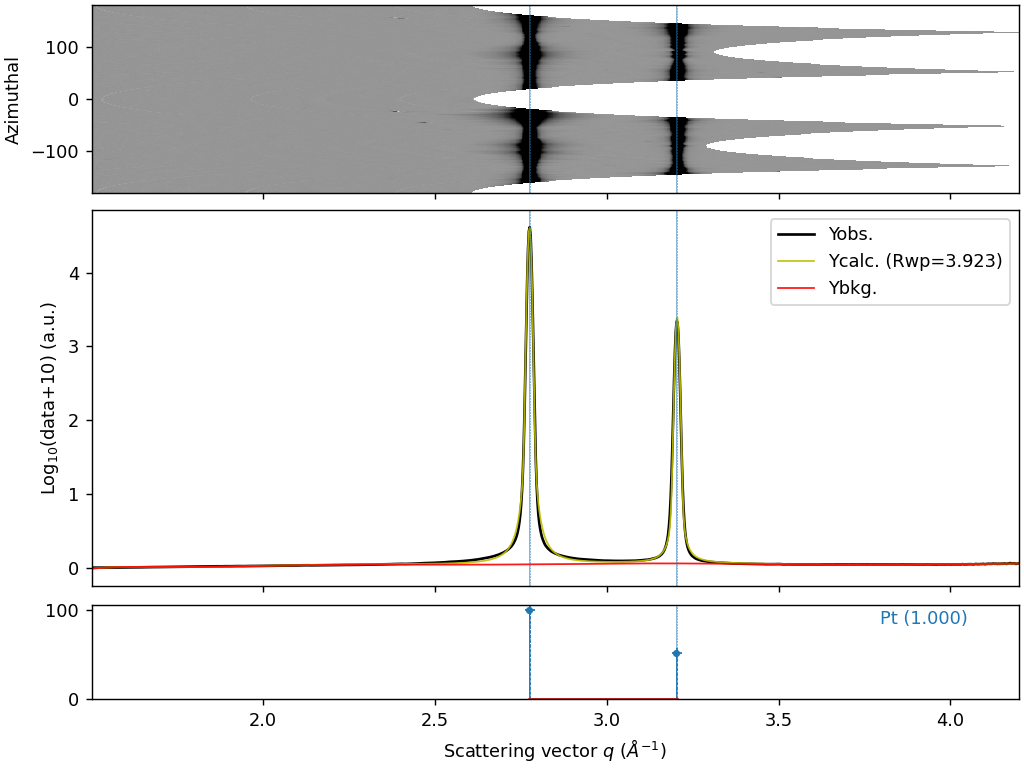

In [9]:
sample = deepcopy(sample_Pt)
sample.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=False,
                    roi_radial_range=[1.5,4.2],
                    plot=False)
sample.load_phases(phases=phases_Pt,plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx='gsas_instprms.gpx')

sample.refine_background(num_coeffs=10)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()
sample.refine_background(num_coeffs=10)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()


# SET TO RIETVELD
sample.set_LeBail(set_to=False,refine=True)
sample.refine_background(num_coeffs=10)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()
sample.refine_background(num_coeffs=10)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()


# ADD TEXTURE
sample.gpx['Phases']['Pt']['Histograms']['PWDR data.xy']['Pref.Ori.'] = ['SH', 1.0, True, [0, 0, 1], 4, {'C(4,1)': 0}, [''], 0.1]
sample.gpx.refine()
sample.gpx['Phases']['Pt']['Histograms']['PWDR data.xy']['Pref.Ori.'][2] = False
sample.gpx.save()


sample.refine_background(num_coeffs=10)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()
sample.refine_background(num_coeffs=10)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()



sample.plot_refinement()

sample.export_gpx_to('gsas_Pt.gpx')

# DAHL

/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Rwp from 1st refinement is = 36.357 
 
Background is refined. Rwp is now 35.611 (was 36.357)
Cell parameters of all phases are refined. Rwp is now 32.879 (was 35.611)
Size broadening of all phases are refined. Rwp is now 15.154 (was 32.879)
Strain broadening of all phases are refined. Rwp is now 15.114 (was 15.154)
Background is refined. Rwp is now 12.723 (was 15.114)
Cell parameters of all phases are refined. Rwp is now 9.553 (was 12.723)
Size broadening of all phases are refined. Rwp is now 9.226 (was 9.553)
Strain broadening of all phases are refined. Rwp is now 7.450 (was 9.226)
Background is refined. Rwp is now 7.474 (was 7.450)
Cell parameters of all phases are refined. Rwp is now 7.436 (was 7.474)
Size broadening of all phases are refined. Rwp is now 7.435 (was 7.436)
Strain broadening of all phases are refined. Rwp is now 7.451 (was 7.435)
After setting LeBail refinement to False, Rwp is now 59.483 (was 7.451)
Phase fractions of all phases are refined. Rwp is now 33.596 (was 5

/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


Cycle 2: 0.02s, Chi**2: 187.2 for 1080 obs., Lambda: 0,  Delta: -6.74e-10, SVD=0
converged
Maximum shift/esd = 9.047 for all cycles
Read from file:/home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.bak0.gpx
Save to file  :/home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx
GPX file save successful
 Refinement results are in file: /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.lst
 ***** Refinement successful *****
gpx file saved as /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx
gpx file saved as /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx
 Hessian Levenberg-Marquardt SVD refinement on 6 variables:
initial chi^2 2057.5 with 1080 obs.
Cycle 0: 0.02s, Chi**2: 24.812 for 1080 obs., Lambda: 0,  Delta: 0.988, SVD=0
Cycle 1: 0.02s, Chi**2: 24.809 for 1080 obs., Lambda: 0,  Delta: 0.000113, SVD=0
converged
Maximum shift/esd = 60.948 for all cycles
Read from file:/home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.bak0.gpx
Save to file  :/home/mt/.gsasii_scratch/10.00_test.gsastmp/

/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


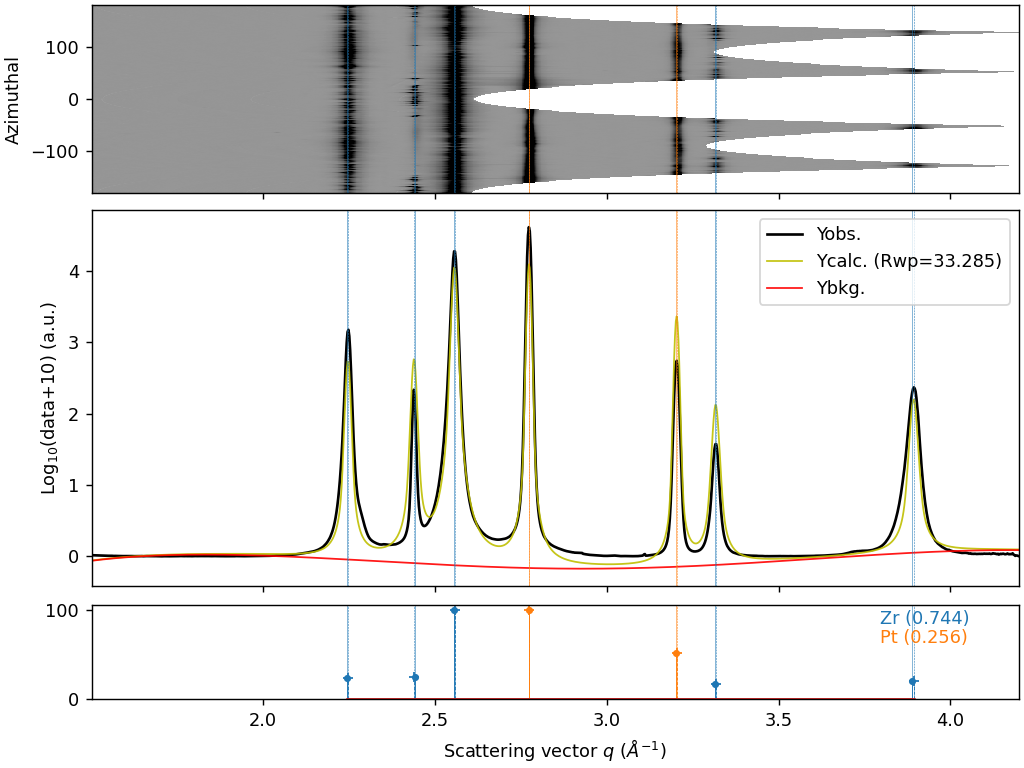

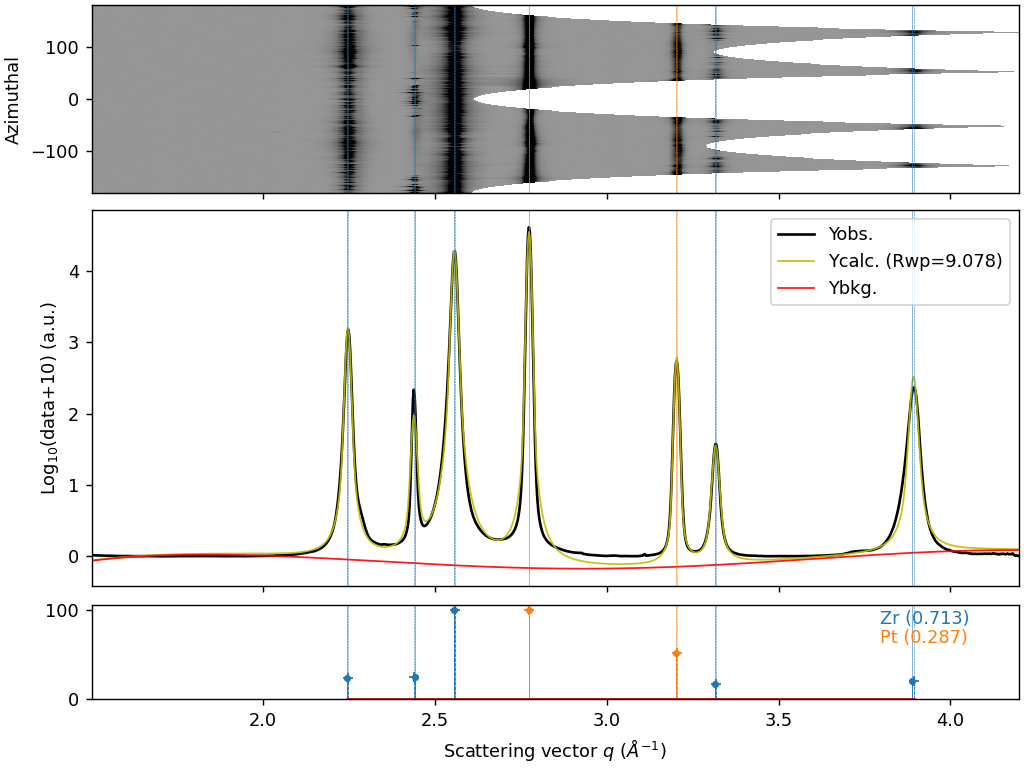

In [20]:
sample = deepcopy(sample_DAHL)
sample.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.5,4.2],
                    spotty_data_correction=False,
                    plot=False)
sample.load_phases(phases=phases_PtZr,plot=False)





#
sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx',yshift_multiplier=0.01)


sample.refine_background(num_coeffs=2)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()

sample.refine_background(num_coeffs=5,set_to_false_after_refinement=False)
sample.refine_cell_params(set_to_false_after_refinement=False)
sample.refine_size_broadening(set_to_false_after_refinement=False)
sample.refine_strain_broadening(set_to_false_after_refinement=False)

sample.refine_background(num_coeffs=5)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()



# SET TO RIETVELD
sample.set_LeBail(set_to=False,refine=True)
sample.refine_phase_fractions()
sample.refine_background(num_coeffs=5)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()
sample.plot_refinement()






# ADD TEXTURE
sample.gpx['Phases']['Pt']['Histograms']['PWDR data.xy']['Pref.Ori.'] = ['SH', 1.0, True, [0, 0, 1], 4, {'C(4,1)': -0.48}, [''], 0.1]
sample.gpx.refine()
sample.gpx['Phases']['Pt']['Histograms']['PWDR data.xy']['Pref.Ori.'][2] = False
sample.gpx.save()

sample.gpx['Phases']['Zr']['Histograms']['PWDR data.xy']['Pref.Ori.'] = ['SH', 1.0, True, [0, 0, 1], 6, {'C(2,0)': 2.312,
                                                                                                         'C(4,0)': 0.59,
                                                                                                         'C(6,0)': -0.947,
                                                                                                         'C(6,6)': -0.3490,
                                                                                                         }, [''], 0.1]
sample.gpx.refine()
sample.gpx['Phases']['Zr']['Histograms']['PWDR data.xy']['Pref.Ori.'][2] = False
sample.gpx.save()
sample.plot_refinement()


# Dogbone

/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Rwp from 1st refinement is = 21.429 
 
Cell parameters of all phases are refined. Rwp is now 20.273 (was 21.429)
Strain broadening of all phases are refined. Rwp is now 6.677 (was 20.273)
Size broadening of all phases are refined. Rwp is now 6.659 (was 6.677)
Background is refined. Rwp is now 5.534 (was 6.659)


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


After setting LeBail refinement to False, Rwp is now 70.619 (was 5.534)
Phase fractions of all phases are refined. Rwp is now 49.651 (was 70.619)


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


gpx file saved as /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx
 Hessian Levenberg-Marquardt SVD refinement on 4 variables:
initial chi^2 392.66 with 1080 obs.
Cycle 0: 0.03s, Chi**2: 158.53 for 1080 obs., Lambda: 0,  Delta: 0.596, SVD=0
Cycle 1: 0.03s, Chi**2: 13.569 for 1080 obs., Lambda: 0,  Delta: 0.914, SVD=0
Cycle 2: 0.03s, Chi**2: 13.569 for 1080 obs., Lambda: 0,  Delta: -8.67e-07, SVD=0
converged
Maximum shift/esd = 160.494 for all cycles
Read from file:/home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.bak0.gpx
Save to file  :/home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx
GPX file save successful
 Refinement results are in file: /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.lst
 ***** Refinement successful *****
gpx file saved as /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx
gpx file saved as /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx
 Hessian Levenberg-Marquardt SVD refinement on 3 variables:
initial chi^2 13.561 with 1080 obs.
Cycle 0: 0.04s, C

/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1287: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


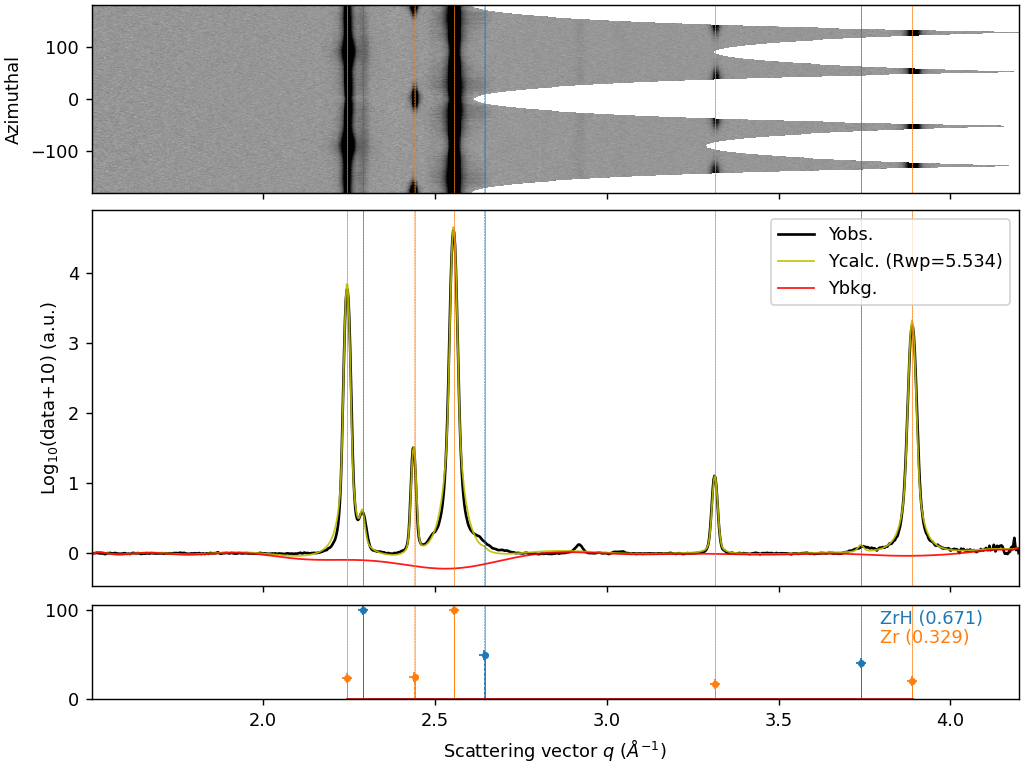

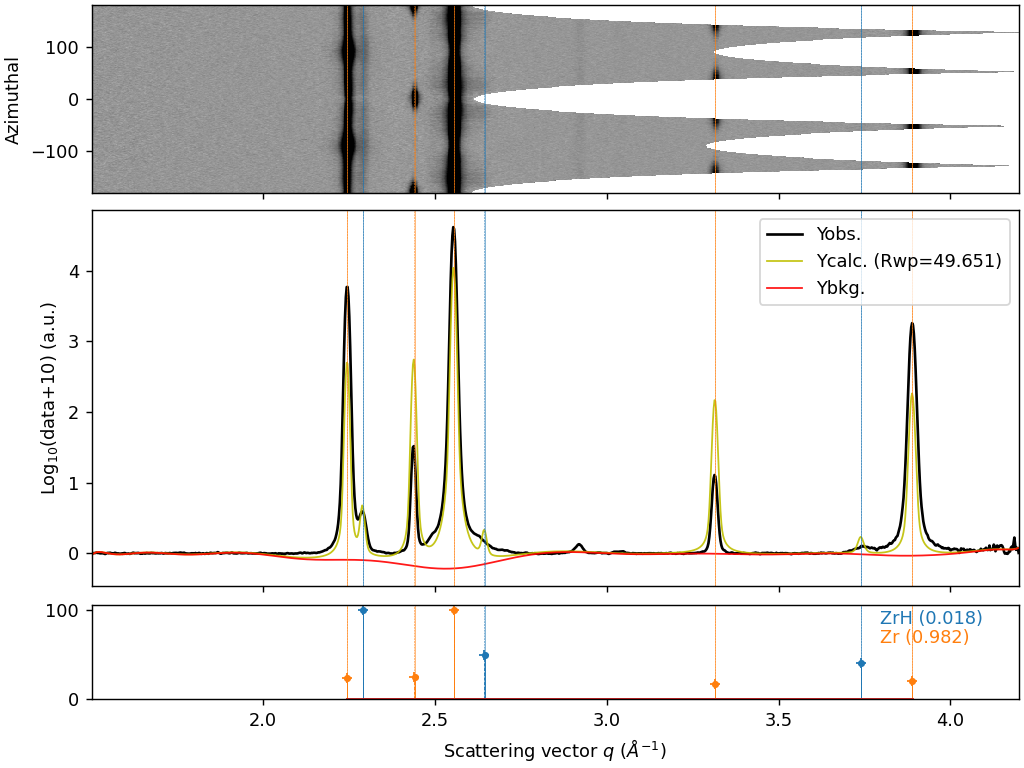

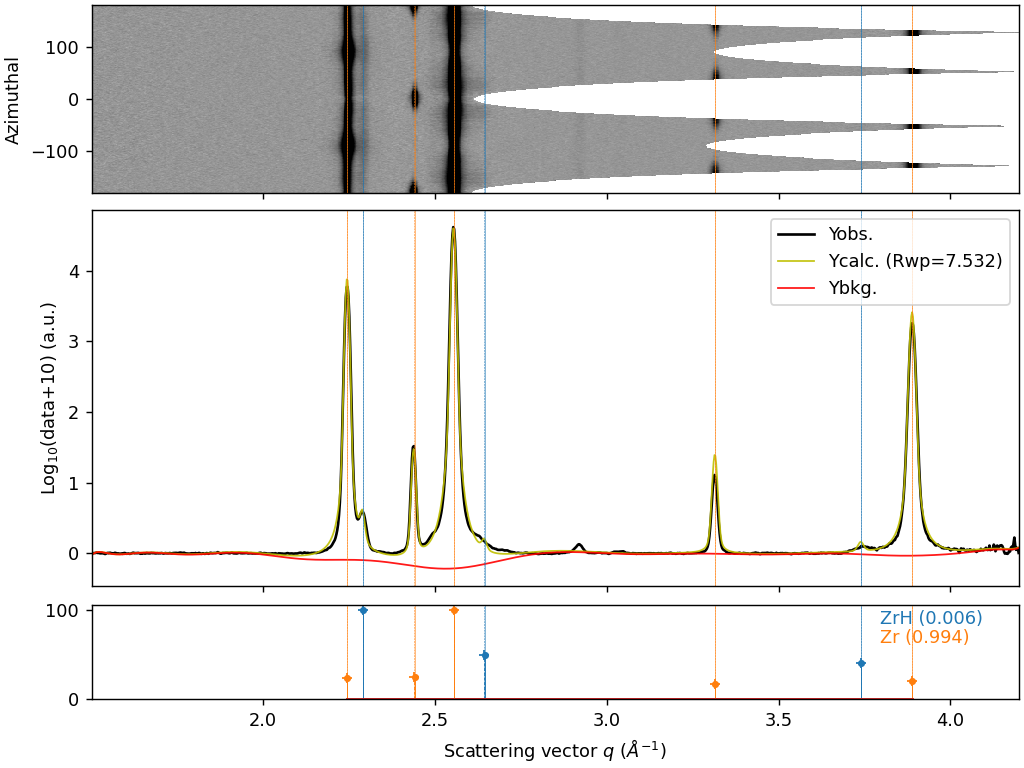

In [26]:
sample = deepcopy(sample_Dogbone)
sample.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.5,4.2],
                    normalize_to=100,
                    plot=False)
sample.load_phases(phases=phases_ZrZrH,plot=False)


# INITIAL REFINEMENT
sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()


# sample.refine_cell_params()
# sample.refine_size_broadening()
# sample.refine_strain_broadening()
# sample.plot_refinement()

# sample.plot_refinement()



sample.set_LeBail(set_to=False,refine=True)
sample.refine_phase_fractions()
sample.plot_refinement()



# ADD TEXTURE
sample.gpx['Phases']['Zr']['Histograms']['PWDR data.xy']['Pref.Ori.'] = ['SH', 1.0, True, [0, 0, 1], 4, {'C(2,0)': -0.48,'C(4,0)': -0.48,}, [''], 0.1]
sample.gpx.refine()
sample.gpx['Phases']['Zr']['Histograms']['PWDR data.xy']['Pref.Ori.'][2] = False
sample.gpx.save()

sample.gpx['Phases']['ZrH']['Histograms']['PWDR data.xy']['Pref.Ori.'] = ['SH', 1.0, True, [0, 0, 1], 4, {'C(4,1)': -0.48,}, [''], 0.1]
sample.gpx.refine()
sample.gpx['Phases']['ZrH']['Histograms']['PWDR data.xy']['Pref.Ori.'][2] = False
sample.gpx.save()

# sample.refine_background(num_coeffs=10)
# sample.refine_size_broadening()
# sample.refine_strain_broadening()
# sample.refine_phase_fractions()


sample.plot_refinement(ylogscale=True)